[(-1.128617393772908, 0.2702541363182372), (-0.8605354492050001, 0.984462169137131), (-0.7218125736001502, 0.3746666071530169)]


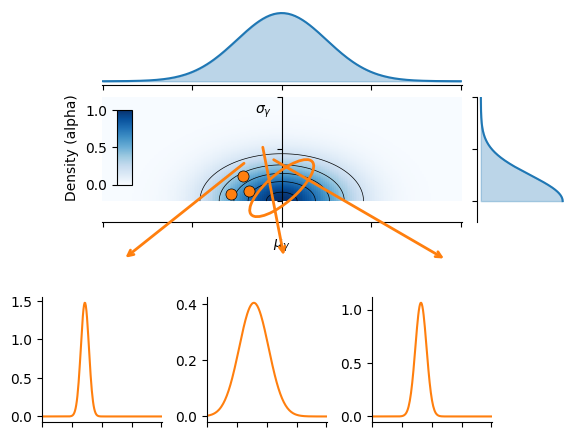

In [ ]:
import numpy as np
from scipy.stats import norm, halfnorm
from matplotlib.patches import Ellipse

import matplotlib.pyplot as plt

# Parameters
mu_gauss = 0  # mean of Gaussian
sigma_gauss = 1  # std dev of Gaussian
scale_halfnormal = 1.0  # scale of Half-Normal

n_steps = 200

n_sd = 4
# Grid for plotting
x = np.linspace(mu_gauss - n_sd * sigma_gauss, mu_gauss + n_sd * sigma_gauss, n_steps)
y = np.linspace(0, n_sd * scale_halfnormal, n_steps)
X, Y = np.meshgrid(x, y)

# Joint probability density
Z = norm.pdf(X, loc=mu_gauss, scale=sigma_gauss) * halfnorm.pdf(
    Y, loc=0, scale=scale_halfnormal
)

# Normalize Z for alpha mapping
Z_norm = Z / Z.max()

fig = plt.figure(figsize=(6, 5))
ax_meta = fig.add_axes([0.2, 0.5, 0.6, 0.25])
ax_cb = fig.add_axes([0.225, 0.575, 0.025, 0.15])
ax_meta.pcolormesh(X, Y, Z, shading="auto", cmap="Blues")
ax_meta.contour(X, Y, Z, colors="k", linewidths=0.5, levels=5)

# Ellipse parameters
ellipse_center = (mu_gauss, scale_halfnormal / 2)
width = 2.5  # major axis length
height = 0.8  # minor axis length
angle = 60  # degrees

ellipse = Ellipse(
    xy=ellipse_center,
    width=width,
    height=height,
    angle=angle,
    edgecolor="tab:orange",
    facecolor="none",
    lw=2,
    zorder=10,
)
ax_meta.add_patch(ellipse)

ax_halfnorm = fig.add_axes([0.825, 0.5, 0.15, 0.25], sharey=ax_meta)
halfnorm_density = halfnorm.pdf(y, loc=0, scale=scale_halfnormal)
ax_halfnorm.plot(halfnorm_density, y, "-", color="tab:blue")
ax_halfnorm.fill_betweenx(y, 0, halfnorm_density, color="tab:blue", alpha=0.3)

ax_norm = fig.add_axes([0.2, 0.775, 0.6, 0.15], sharex=ax_meta)
norm_density = norm.pdf(x, loc=mu_gauss, scale=sigma_gauss)
ax_norm.plot(x, norm_density, "-", color="tab:blue")
ax_norm.fill_between(x, 0, norm_density, color="tab:blue", alpha=0.3)

plt.setp(
    ax_meta,
    xlabel="$\mu_{\gamma}$",
    ylabel="$\sigma_{\gamma}$",
    # title="Joint PDF: Gaussian (x) & Half-Normal (y)",
    yticklabels=[],
)
ax_meta.spines["left"].set_position("center")
plt.setp(ax_meta.yaxis.label, va="top", rotation=0)
ax_meta.yaxis.set_label_coords(0.45, 0.95)
ax_meta.spines[["top", "right"]].set_visible(False)

plt.setp(ax_halfnorm, xticks=[])  # , yticklabels=[])
ax_halfnorm.spines[["top", "right", "bottom"]].set_visible(False)

plt.setp(ax_norm, xticklabels=[], yticks=[])
ax_norm.spines[["top", "right", "left"]].set_visible(False)

fig.colorbar(plt.cm.ScalarMappable(cmap="Blues"), label="Density (alpha)", cax=ax_cb)
# Move colorbar ticks and label to the left side
ax_cb.yaxis.set_ticks_position("left")
ax_cb.yaxis.set_label_position("left")


samples = list(
    zip(
        norm.rvs(loc=mu_gauss, scale=sigma_gauss, size=3),
        halfnorm.rvs(loc=0, scale=scale_halfnormal, size=3),
    )
)
samples.sort(key=lambda s: s[0])

for i, sample in enumerate(samples):
    ax_meta.plot(
        sample[0],
        sample[1],
        "o",
        color="tab:orange",
        markersize=8,
        markeredgecolor="k",
        markeredgewidth=0.5,
    )

    ax = fig.add_axes([0.1 + 0.275 * i, 0.1, 0.2, 0.25], sharex=ax_norm)
    ax.plot(x, norm.pdf(x, loc=sample[0], scale=sample[1]), "-", color="tab:orange")
    ax.spines[["top", "right"]].set_visible(False)

    # Get the display coordinates of the sample point in ax_meta
    xy_disp = ax_meta.transData.transform((sample[0], sample[1]))
    # Get the display coordinates of the center-top of the added axis
    bbox = ax.get_position()
    fig_w, fig_h = fig.get_size_inches()
    center_x = (bbox.x0 + bbox.x1) / 2 * fig_w * fig.dpi
    top_y = bbox.y1 * fig_h * fig.dpi

    # Draw the arrow in figure coordinates
    ax_meta.annotate(
        "",
        xy=(center_x, top_y),
        xycoords="figure pixels",
        xytext=xy_disp,
        textcoords="figure pixels",
        arrowprops=dict(
            arrowstyle="->", color="tab:orange", lw=2, shrinkA=5, shrinkB=5
        ),
    )
print(samples)

"""
This is wrong! meta distribution doesnt provide different values for all mice, but defines prior from which different subvalues are drawn.
"""

plt.show()